<a href="https://colab.research.google.com/github/satyam-jyoti-sankar/Rossmann-Sales-Prediction-/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [71]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploring  Dataset

In [73]:
sales_df=pd.read_csv('/content/drive/MyDrive/ captstone_project-2/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/ captstone_project-2/store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Dataset:-1

In [74]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Here we se no missing valu in our dataset and our data set contains 1017209 data.

In [75]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


This dataset contains information on various stores associated with Rossmann. 

It has information for sales for each day, no. of customers on that day, holidays, Promos for each day and what day of week it is.


In [76]:
print(sales_df['Date'].min(),'- start')
print(sales_df['Date'].max(), '- end')

2013-01-01 - start
2015-07-31 - end


Here we se that our all data are between 2013 to 2015

In [77]:
sales_df[sales_df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


No duplicate valu present in the data set.

In [78]:
sales_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

Here there are so many data where store is not open .

If store is not open we can't predict sales because sales also 0 if sore are closed.So we conclude only those date where store are open.

In [79]:
# Only consider those data which day store is open
sales_df = sales_df[(sales_df['Open'] == 1)]


In [80]:
# Dropping Open column because no need of of coloum of single valu. 
sales_df.drop(['Open'],axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [81]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


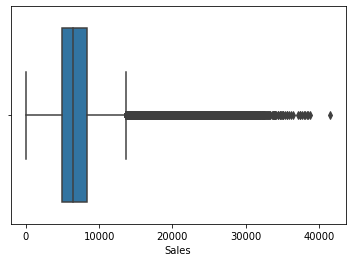

In [82]:
# Checking outliers in Sales
sns.boxplot(sales_df['Sales'])

Many outliers on right side in above plot. So might be those stores are having high sales

###**Using Isolation Forest to remove outliers only in Sales**

In [83]:
from sklearn.ensemble import IsolationForest

In [84]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.005)
isolation_forest.fit(sales_df['Sales'].values.reshape(-1, 1))
sales_df['anomaly_score_univariate_sales'] = isolation_forest.decision_function(sales_df['Sales'].values.reshape(-1, 1))
sales_df['outlier_univariate_sales'] = isolation_forest.predict(sales_df['Sales'].values.reshape(-1, 1))

### From above plot it is clear intution that our outliers would be above 19000 or 20000.

In [85]:
# Sanity check if there are no outliers removed below 19000
sales_df[(sales_df['outlier_univariate_sales']==-1) & (sales_df['Sales']<19000)]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,anomaly_score_univariate_sales,outlier_univariate_sales


In [86]:
# Total outliers detected
len(sales_df[sales_df['outlier_univariate_sales']==-1])

4149

### Outliers are very few compared to our dataset. So can remove them. 

In [87]:
# Subsetting DF other than outliers.
sales_df = sales_df[sales_df['outlier_univariate_sales']==1]

In [88]:
# Removing Isolation Forest columns
sales_df.drop(['anomaly_score_univariate_sales','outlier_univariate_sales'],axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [89]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840243 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          840243 non-null  int64 
 1   DayOfWeek      840243 non-null  int64 
 2   Date           840243 non-null  object
 3   Sales          840243 non-null  int64 
 4   Customers      840243 non-null  int64 
 5   Promo          840243 non-null  int64 
 6   StateHoliday   840243 non-null  object
 7   SchoolHoliday  840243 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 57.7+ MB


## Dataset:-2

In [90]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [91]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

###For competition distance can directly replace Nan by mean, because only 3 missing values. 

### For Month and year can not use mean or mode as there are many missing values. So will try different methods like ffill and backfill to not get same values for all those missing but later.

In [92]:
# Replacing missing values in competition distance with mean
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(),inplace=True)

In [93]:
# # Replacing Nan with 0 in PromoInterval col.
# store_df.update(store_df[['PromoInterval']].fillna(0))

In [94]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

# EDA

## Dataset:-1

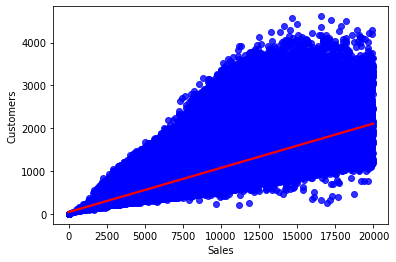

In [95]:
# How customers affect sales
sns.regplot(x=sales_df['Sales'], y=sales_df['Customers'],scatter_kws={"color": "blue"}, line_kws={"color": "red"})

Our target variable is sales when we compare with no of coustumbers here we se when no of coustumber inc no of sales also increase.

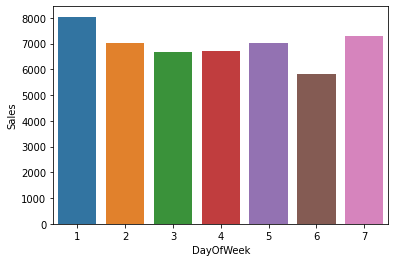

In [96]:
# How Sales differ in each day of week
Avg_week_sales = pd.DataFrame(sales_df.groupby('DayOfWeek').agg({'Sales':'mean'}))
sns.barplot(x=Avg_week_sales.index, y = Avg_week_sales['Sales'])

In the sale on day wise we se monday and sunday .Other are almos close .

so day is not a good factor ..it remain constat every day. 

**But if we se in day of sunday many store are closed but still it shows sale of sunday is high in compare of other day so we can say peole mos go to store on sunday.**

**High sales in starting of week. On Sunday only some stores are open and they are making great Sale.**

In [97]:
# Store open on Sunday
len(sales_df[(sales_df['DayOfWeek']==7)]['Store'].unique())


32

**Among 1115 stores only 32 stores open in sunday but still the total sale is  high in compare to other day.**

How sales differ with Promo

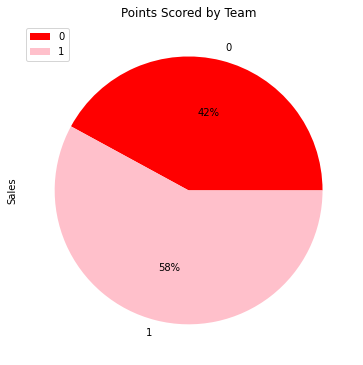

In [98]:
Avg_Promo_sales = pd.DataFrame(sales_df.groupby('Promo')['Sales'].mean())
Avg_Promo_sales.plot(kind='pie', y='Sales', autopct='%1.0f%%',
                                colors = ['red', 'pink'],
                                title='Points Scored by Team',figsize=(6,10))

Sales on Holidays and Holiday Counts

Text(0, 0.5, 'Counts')

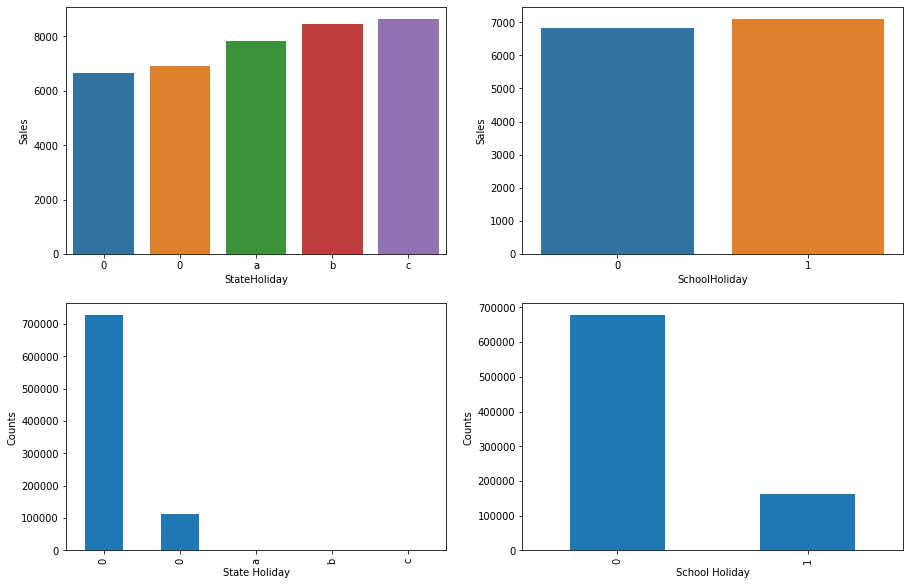

In [99]:
Avg_StateHoliday_sales = pd.DataFrame(sales_df.groupby('StateHoliday')['Sales'].mean())
Avg_SchoolHoliday_sales = pd.DataFrame(sales_df.groupby('SchoolHoliday')['Sales'].mean())

# How sales differ in holidays
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Avg_StateHoliday_sales.index, y = Avg_StateHoliday_sales['Sales'])
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Avg_SchoolHoliday_sales.index, y = Avg_SchoolHoliday_sales['Sales'])

# plotting data on chart

# How many Total School and State holidays
ax1=plt.subplot(2, 2,4)
sales_df['SchoolHoliday'].value_counts().plot(kind='bar')
plt.xlabel('School Holiday')
plt.ylabel('Counts')
ax1=plt.subplot(2, 2,3)
sales_df['StateHoliday'].value_counts().plot(kind='bar')
plt.xlabel('State Holiday')
plt.ylabel('Counts')

NO much difference in sales on School Holidays. On state holidays all stores are to be closed except few.

 But for state holidays we have two 0 columns and others are strings. So will convert all of them to numerical.

 Also count for state holidays is less. So will aggregate all State Holidays as 1.

In [100]:
def num_state_holidays(string):
  if (string == 'a') | (string == 'b') | (string == 'c'):
    return 1
  else:
    return 0

In [101]:
sales_df['StateHoliday'] = sales_df['StateHoliday'].apply(num_state_holidays)

As for our dataset 3 type of holiday but we combine all and take all as holy day and other as not holiday.
holiday as 1 else 0

In [102]:
sales_df['StateHoliday'].value_counts()

0    839370
1       873
Name: StateHoliday, dtype: int64

###We have gone through all features initially and have see how sales differ for all of them. 

###**Avg Sales and Customer Data Set**

In [103]:
avg_sales_df =pd.DataFrame(sales_df.groupby('Store')['Customers','Sales'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Our goal is to predict sales day wise so we consider avg sales perday so we predict the sales per day .

In 2nd we have avg coustumber to a store .

If we consider sum of sales then it predict sales store wise in a yr.

In [104]:
avg_sales_df

,Customers,Sales
Store,,
1,564.049936,4759.096031
2,583.998724,4953.900510
3,750.077022,6942.568678
4,1321.752551,9638.401786
5,537.340180,4676.274711
...,...,...
1111,451.711168,5251.702182
1112,829.988296,10076.834850
1113,717.029337,6627.859694


In [105]:
avg_sales_df.columns = ['Avg_customers','Avg_sales']

In [106]:
avg_sales_df

,Avg_customers,Avg_sales
Store,,
1,564.049936,4759.096031
2,583.998724,4953.900510
3,750.077022,6942.568678
4,1321.752551,9638.401786
5,537.340180,4676.274711
...,...,...
1111,451.711168,5251.702182
1112,829.988296,10076.834850
1113,717.029337,6627.859694


## Dataset:-2

### **Different kind of store model**

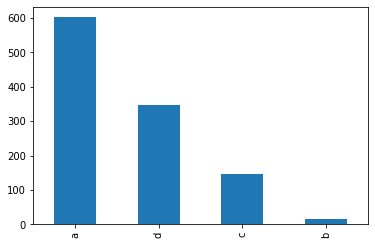

In [107]:
# Different kind of store model
store_df['StoreType'].value_counts().plot(kind='bar')

**There are 4 type of model..There are very less no of data for store b ..And in top a ,store  high no of data.**

### Assortment 

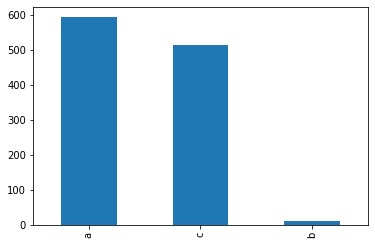

In [108]:
#Assortment 
store_df['Assortment'].value_counts().plot(kind='bar')

In assortment also b is so low in comapre to a and c.

Assortment - describes an assortment level: a = basic, b = extra, c = extended

So here we know that thre are either basic or exended but less of extra


### Promo2

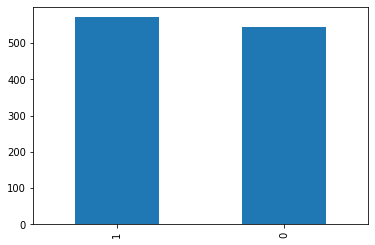

In [109]:
store_df['Promo2'].value_counts().plot(kind='bar')

### PROMO INTERVAL counts

In [110]:
#PROMO INTERVAL
store_df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew

Here 3 different prmointerval  and jan,apr,july oct is high in compare to both .

Here we conclude that 2 months interval for promo is  high.

In [111]:
len(store_df['Store'].unique())


1115

## Merge dataset 

In [112]:
# Merging avg sales dataset with store df
store_df = pd.merge(store_df,avg_sales_df, on = 'Store', how = 'left')

In [113]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
 10  Avg_customers              1115 non-null   float64
 11  Avg_sales                  1115 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 113.2+ KB


In [114]:
store_df.head() 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_customers,Avg_sales
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,564.049936,4759.096031
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",583.998724,4953.900510
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",750.077022,6942.568678
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,1321.752551,9638.401786
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,537.340180,4676.274711


##**Final Data Set**

###Now we already have unique stores in both datasets, so can merge both data sets and draw some meanigful insights from that.

In [115]:
# Mrging both DFs
Final_df = pd.merge(sales_df,store_df, on = 'Store', how = 'left')

In [116]:
# Shape of final dataset
Final_df.shape

(840243, 19)

### EDA and re-arranging Final Dataset

In [117]:
# If store is open and there is no sale
len(Final_df[(Final_df['Sales'] == 0)])

54

### There are very few observations where Sales is 0. This can be a possibility that on certain days there was no Sale.

##**Feature Eng**

In [118]:
# One hot encoding
Final_df = pd.get_dummies(Final_df, columns=['StoreType','PromoInterval', 'Assortment'], prefix=['StoreType','PromoInterval', 'Assortment'])

### Date columns to Date time and extract month and year.

In [119]:
import datetime

In [120]:
# Seperating month, year and day from date.
Final_df['Month'] = pd.DatetimeIndex(Final_df['Date']).month
Final_df['Year'] = pd.DatetimeIndex(Final_df['Date']).year
Final_df['Day'] = pd.DatetimeIndex(Final_df['Date']).day

In [121]:
# Dropping original Date column. 
#Final_df.drop(['Date'],axis = 1, inplace=True)

### Now we will find Total competition months by aggregating 'Total_competition_year' and 'Total_competition_months' for each obsservation. 

In [122]:
Final_df['Total_competition_year'] = Final_df['Year'] - Final_df['CompetitionOpenSinceYear']

In [123]:
Final_df['Total_competition_months'] = (Final_df['Total_competition_year']*12) - (Final_df['CompetitionOpenSinceMonth'] - 1) + (Final_df['Month'])

In [124]:
# Removing both original columns
Final_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Total_competition_year'],axis = 1, inplace=True)

###Doing Same for Promo as well.

In [125]:
Final_df['Total_promo_years'] = Final_df['Year'] - Final_df['Promo2SinceYear']

In [126]:
Final_df['Total_promo_weeks'] = (Final_df['Total_promo_years']*52) - (Final_df['Promo2SinceWeek']-1) + (Final_df['Month']*4)

In [127]:
# Removing both original columns
Final_df.drop(['Total_promo_years', 'Promo2SinceYear', 'Promo2SinceWeek'],axis = 1, inplace=True)

### Now we will replace null values in both this columns to get a complete dataset. 

In [128]:
# Replacing Nan with 0 in below cols.
Final_df.update(Final_df[['Total_promo_weeks']].fillna(0))

In [129]:
# Replacing missing values in Competition open since month by ffill, limit = 2
Final_df.fillna(method='ffill', limit = 1, inplace = True)

In [130]:
# Replacing missing values in Competition open since month by ffill, limit = 2
Final_df.fillna(method='backfill', limit = 2, inplace = True)

In [131]:
# Filling rest values with mean
Final_df['Total_competition_months'].fillna(Final_df['Total_competition_months'].mean(),inplace=True)

In [132]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840243 entries, 0 to 840242
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           840243 non-null  int64  
 1   DayOfWeek                       840243 non-null  int64  
 2   Date                            840243 non-null  object 
 3   Sales                           840243 non-null  int64  
 4   Customers                       840243 non-null  int64  
 5   Promo                           840243 non-null  int64  
 6   StateHoliday                    840243 non-null  int64  
 7   SchoolHoliday                   840243 non-null  int64  
 8   CompetitionDistance             840243 non-null  float64
 9   Promo2                          840243 non-null  int64  
 10  Avg_customers                   840243 non-null  float64
 11  Avg_sales                       840243 non-null  float64
 12  StoreType_a     

###Finally we have a complete dataset with no missing values. 